<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Naive Bayes

## Table of Content
1. [Introduction to Naive Bayes](#section1)<br>
    - 1.1 [Condiitonal Probability](#section101)<br>
    - 1.2 [Bayes Rule](#section103)<br>
    - 1.3 [Mathematics](#section103)<br>
    - 1.4 [Explanation through example](#section104)<br>
    - 1.5 [Is naive Bayes really good?](#section105)<br>
2. [Use Case - Credit card fraud detection](#section2)<br>
3. [Data loading and description](#section3)<br>
4. [Data Interpretation and Visualization](#section4)<br>
5. [Train test split](#section5)<br>
    - 5.1 [User defined function to split the data](#section501)<br>
    - 5.2 [User defined function to fit and predict the data](#section502)<br>
    - 5.3 [User defined function to print the classifier scores](#section503)<br>
6. [Modelling and prediction](#section6)<br>
    - 6.1 [Gaussian Naive Bayes](#section601)<br>
        - 6.1.1 [Case:1 - Without dropping anything](#section602)<br>
        - 6.1.2 [Case:2 - Dropping principal components ahving similar distribution](#section603)<br>
        - 6.1.3 [Case:3 - Dropping some principal components + Time](#section604)<br>
        - 6.1.4 [Case:4 - Dropping some principal components + Time + Scaled_Amount](#section605)<br>
    - 6.2 [Logistic Regression](#section606)<br>
        - 6.2.1 [Case:1 - Normal data](#section607)<br>
        - 6.2.2 [Case:2 - Using Undersample data](#section608)<br>
        - 6.2.3 [Case:3 - Using train as undersample data and test as full data](#section609)<br>
        - 6.2.4 [Case:4 - Case to differentiate GB-4 and LR-4](#section610)<br>
7. [Conclusions](#section7)

<a id=section1></a>

## 1. Introduction to Naive Bayes

- Collection of __classification__ algorithms based on __Bayes Theorem__.
- Classifies given different __instances (object/data)__ into __predefined classes(groups)__, assuming there is no interdependency of features __(class conditional independence)__.

Just before exploring NB in details, let’s understand __few basic concepts__ first:
1. Conditional Probability
2. Bayes Rule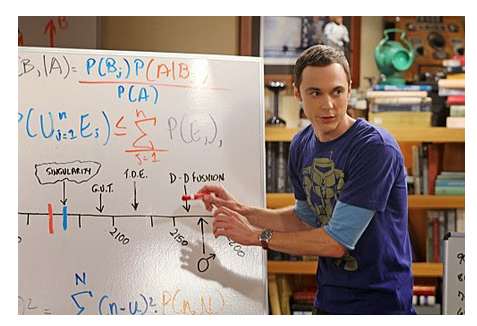

<a id=section101></a>

### 1.1  Conditional Probability
> This gives us the chance that something will happen given that something else has already happened.

Let’s say, there is an __outcome ‘B’__ and some __evidence ‘A’__ of that _outcome_. From the way these probabilities are defined:<br> The __probability of having both the outcome ‘B’ and the evidence ‘A’ is:__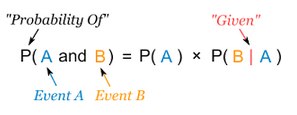

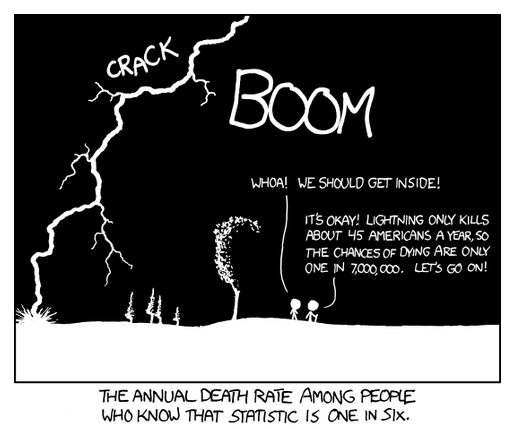

<a id=section102></a>

### 1.2. Bayes Rule
Conceptually, this is the way to go from __P(Evidence|known Outcome)__ to __P(Outcome|known Evidence)__.<br>
Often, we know how frequently some particular __evidence is _observed_, given a known outcome__.<br> 
We have to use this known fact to __compute the reverse__, i.e. _to compute the chance of that outcome happening given the evidence._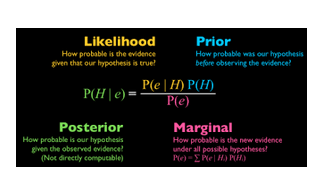

#### Example:
Consider a __population__ where a __disease D has broken out__. The municipality in order to __test the disease uses a machine which gives a _positive output with some probability_ given the person has disease__.<br>
 
 __Probability of disease D given test-positive__ = 
 [P( Test is +ve | disease ) * P ( disease )] / P (+ve test, with or without disease)

<a id=section103></a>

## 1.3. Mathematics
So far we have talked about only a single piece of evidence. However, in __real life situations there are _multiple pieces of evidence_ that confirm the _occurrence_ or _nonoccurrence_ of an event__.

__Mathematics tends to get complicated as these are often correlated__ to each other. Quite intuitively, one such approach is to __‘uncouple’__ _multiple pieces of evidence_, and treat each piece of evidence as __independent__. Hence, the name!

The mathematical interpretation of independence of features is illustrated by the fact that the __class conditional probabilities can be computed as a product of individual probabilities:__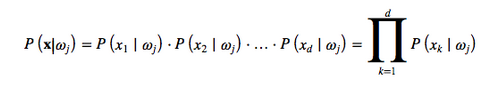
Here, __‘d’ evidences__ were observed for the occurrence of the __event ‘wj’__. The naive assumption of __independence of variables__ allowed us to write the __probabilities__ as the _product of individual class-conditional probabilities_

<a id=section104></a>

## 1.4. Explanation through example

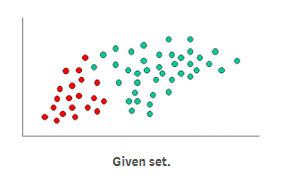
As indicated, the objects can be classified as either `GREEN` or `RED`. Our task is to classify new cases as they arrive, i.e., __decide to which class label they belong__, based on the currently existing objects.

Since there are __twice as many__ `GREEN` objects as `RED`, it is reasonable to believe that a __new case__ (which hasn't been observed yet) is __twice as likely to have membership GREEN rather than RED__. 

In the Bayesian analysis, this belief is known as the __prior probability__. Prior probabilities are based on __previous experience__. In this case, the percentage of `GREEN` and `RED` objects, are often used to __predict outcomes before they actually happen__.

Since, there are a __total of 60 objects__, __40 of which are GREEN and 20 RED__, our prior probabilities for class membership are:

__Prior Probability of `GREEN`__: number of `GREEN` objects / total number of objects = __40 / 60__

__Prior Probability of `RED`__: number of `RED` objects / total number of objects = __20 / 60__

Having formulated our prior probability, we are now __ready to classify a new object__ (`WHITE` circle in the diagram below).
> Since the objects are __well clustered__, it is reasonable to assume that the more `GREEN` (or `RED`) objects in the vicinity of X, the more likely that the __new cases__ belong to that particular color.

To measure this __likelihood__, we draw a __circle around X which encompasses a number__ (to be chosen apriori) of points irrespective of their class labels. Then, we __calculate the number of points in the circle__ belonging to each class label: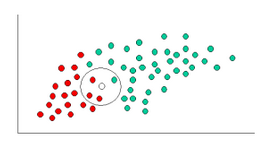

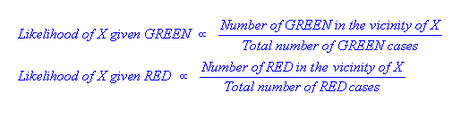

From the illustration above, it is clear that __Likelihood of X given `GREEN` is smaller than Likelihood of X given `RED`__, since the __circle__ encompasses __1`GREEN`__ object and __3`RED`__ ones. Thus: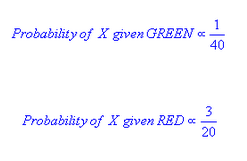

Although the __prior probabilities__ indicate that __X may belong to `GREEN`__ (given that there are twice as many GREEN compared to RED) the __likelihood indicates otherwise__; 
- The class membership of __X is `RED`__ (given that there are more `RED` objects in the vicinity of X than `GREEN`).
> _In the Bayesian analysis, the final classification is produced by combining both sources of information, i.e., the prior and the likelihood, to form a posterior probability using the so-called Bayes' rule_.
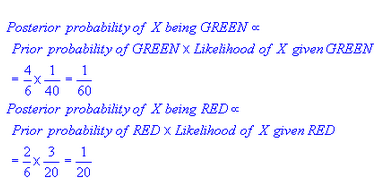

> __Finally, we classify X as RED since its class membership achieves the largest posterior probability__.

<a id=section105></a>

## 1.5. Is Naive Bayes really good?

### Pros:
1. __Easy__ and __fast__ to predict class of test data set. Also, performs well in multi-class prediction.
2. When __assumption of independence__ holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.
3. It perform well in case of __categorical input variables__ compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).

### Cons:
1. __Zero Frequency__: If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a zero probability and will be unable to make a prediction.To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.
2. __Bad estimator__: Probability outputs from predict_proba are not to be taken too seriously.
3. __Assumption of independent predictors__: In real life, it is almost impossible that we get a set of predictors which are completely independent.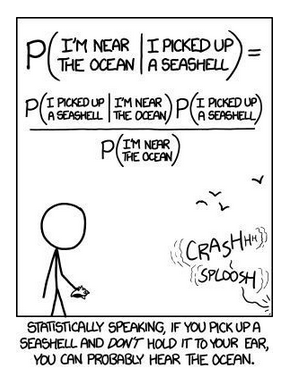

### Pictorial explanation of Naive bayes Classification

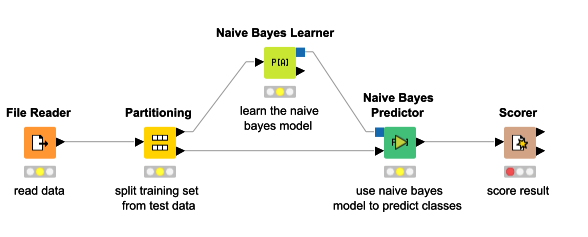

<a id=section2></a>

## 2. Use Case - Credit Card Fraud

### Context

It is important that credit card companies are able to recognize __fraudulent credit card transactions__ so that customers are not charged for items that they did not purchase.

### Content
The datasets contains transactions made by credit cards in _September 2013_ by __European cardholders__. This dataset presents transactions that occurred in __two__ days, where we have __38 frauds out of 10000 transactions__. The dataset is highly unbalanced, the __positive class (frauds) account for 0.0038%__ of all transactions.

It contains only __numerical input variables which are the result of a PCA transformation__. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA.<br>
- The only features which have _not been transformed with PCA_ are __'Time' and 'Amount'__. 
- Feature __'Time'__ contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- The feature __'Amount'__ is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 
- Feature __'Class'__ is the response variable and it takes value __1 in case of fraud and 0 otherwise__.

### Inspiration
Identify __fraudulent credit card transactions__.

<a id=section3></a>

## 3. Data loading and description

### Import the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

### Import the dataset

In [2]:
cc = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/credit_fraud.csv")
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Check the columns present in the dataset

In [3]:
cc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Check the shape of the dataset

In [4]:
cc.shape

(10000, 31)

### Check the descriptive statistics of the given dataset

In [5]:
cc.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5966.033400,-0.241862,0.281949,0.906270,0.264148,-0.046398,0.133108,-0.071689,-0.064778,0.802224,...,-0.051990,-0.152671,-0.033268,0.021335,0.087146,0.108140,0.005518,0.002915,63.030188,0.00380
std,4473.403739,1.521679,1.308139,1.159154,1.441235,1.182935,1.307311,1.077430,1.259064,1.155198,...,0.913811,0.631083,0.487814,0.594430,0.428171,0.562793,0.410868,0.266247,184.486158,0.06153
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.00000
25%,2072.750000,-1.013283,-0.208342,0.412799,-0.614424,-0.643390,-0.629934,-0.542336,-0.190747,0.070868,...,-0.268120,-0.549638,-0.174120,-0.327817,-0.158137,-0.327974,-0.084489,-0.015753,5.000000,0.00000
50%,4563.500000,-0.372799,0.288524,0.944361,0.219861,-0.152769,-0.152566,-0.055585,0.012865,0.805275,...,-0.123273,-0.136746,-0.045794,0.079976,0.121001,0.042865,-0.004568,0.015897,15.950000,0.00000
75%,10233.250000,1.150864,0.901879,1.602903,1.125666,0.371081,0.505357,0.476280,0.274533,1.506299,...,0.032707,0.247490,0.081665,0.410877,0.359058,0.476394,0.120811,0.077182,50.960000,0.00000
max,15012.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.00000


### Check the info of the dataset

In [6]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
Time      10000 non-null int64
V1        10000 non-null float64
V2        10000 non-null float64
V3        10000 non-null float64
V4        10000 non-null float64
V5        10000 non-null float64
V6        10000 non-null float64
V7        10000 non-null float64
V8        10000 non-null float64
V9        10000 non-null float64
V10       10000 non-null float64
V11       10000 non-null float64
V12       10000 non-null float64
V13       10000 non-null float64
V14       10000 non-null float64
V15       10000 non-null float64
V16       10000 non-null float64
V17       10000 non-null float64
V18       10000 non-null float64
V19       10000 non-null float64
V20       10000 non-null float64
V21       10000 non-null float64
V22       10000 non-null float64
V23       10000 non-null float64
V24       10000 non-null float64
V25       10000 non-null float64
V26       10000 non-null float64
V27

<a id=section4></a>

## 4. Data Interpretation and Visualization

### Check for the missing value present in the dataset

In [7]:
cc.isnull().sum().any()

False

### Check the class variable using pie chart

Class as pie chart:


Text(0,0.5,'')

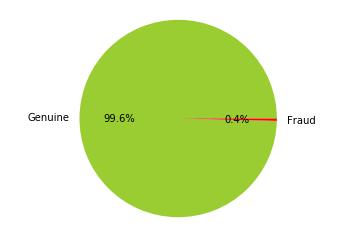

In [8]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(cc.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

### Plot histogram to see if there is any trend in Time variable

Time variable
9995    4.166944
9996    4.167778
9997    4.168889
9998    4.169444
9999    4.170000
Name: Time_Hr, dtype: float64


Text(0,0.5,'# transactions')

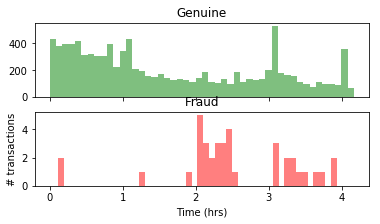

In [9]:
#plot Time to see if there is any trend
print("Time variable")
cc["Time_Hr"] = cc["Time"]/3600 # convert to hours
print(cc["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(cc.Time_Hr[cc.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(cc.Time_Hr[cc.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

### Observations:

This "Time" feature shows that rate of transactions is picking up during day time. But number of transactions have almost similar dependence on time of the day for both the classes.  So, I believe this feature does not yield any predictive power to distinguish between the two classes. But ofcourse we will later test this assumption. For now, I'll keep this feature in data frame. We will drop "Time".

In [10]:
cc = cc.drop(['Time'],axis=1)

### Plot histogram to check Amount variable

Text(0,0.5,'# transactions')

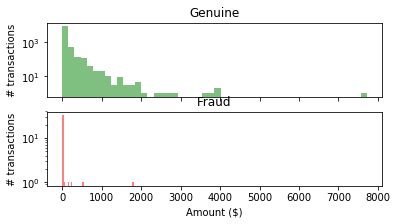

In [11]:
#let us check another feature Amount
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(cc.Amount[cc.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(cc.Amount[cc.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

interesting to note "all transaction amounts > 10K in Genuine Class only". Also this amount feature is not on same scale as principle components. So, I'll standardize the values of the 'Amount' feature using StandardScalar and save in data-frame for later use.

In [12]:
from sklearn.preprocessing import StandardScaler
cc['scaled_Amount'] = StandardScaler().fit_transform(cc['Amount'].values.reshape(-1,1))
cc = cc.drop(['Amount'],axis=1)

C:\Users\mrshu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


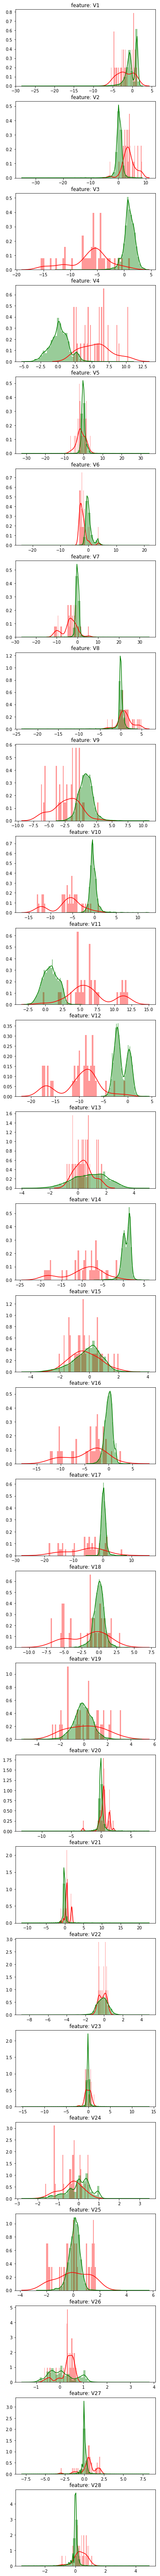

In [13]:
#let us check correlations and shapes of those 25 principal components.
# Features V1, V2, ... V28 are the principal components obtained with PCA.
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(cc[cc.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(cc[col][cc.Class == 1], bins=50, color='r')
    sns.distplot(cc[col][cc.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

For some of the features, both the classes have similar distribution. So, I don't expect them to contribute towards classifying power of the model. So, it's best to drop them and reduce the model complexity, and hence the chances of overfitting. Ofcourse as with my other assumptions, I will later check the validity of above argument.

Now, it's time to split the data in test set (20%) and training set (80%). I'll define a function for it.

<a id=section5></a>

## 5. Train test split

<a id=section501></a>
#### 5.1 User defined function to split the dataset into train and test

In [14]:
def split_data(cc, drop_list):
    cc = cc.drop(drop_list,axis=1)
    print(cc.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = cc['Class'].values #target
    X = cc.drop(['Class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

Below is funtion to define classifier and get predictions.
We can use "predict()" method that checks whether a record should belong to "Fraud" or "Genuine" class.
There is another method "predict_proba()" that gives the probabilities for each class. It helps us to learn the idea of changing the threshold that assigns an instance to class 1 or 0, thus we can control precision and recall scores. This would be used to calculate area under ROC.

<a id=section502></a>
#### 5.2 User defined function to fit and predict the model

In [15]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

<a id=section503></a>
#### 5.3 User defined function to print the classifier score

In [16]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

<a id=section6></a>
## 6. Modelling and prediction

<a id=section601></a>
## 6.1 Gaussian Naive Bayes

<a id=section602></a>
### 6.1.1 Case-NB-1 : do not drop anything

In [17]:
drop_list = []
X_train, X_test, y_train, y_test = split_data(cc, drop_list)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Time_Hr',
       'scaled_Amount'],
      dtype='object')
train-set size:  8000 
test-set size:  2000
fraud cases in test-set:  8


In [18]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)

train-set confusion matrix:
 [[7916   54]
 [   1   29]]


In [19]:
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1965   27]
 [   1    7]]
recall score:  0.875
precision score:  0.20588235294117646
f1 score:  0.33333333333333337
accuracy score:  0.986
ROC AUC: 0.9888616967871485


<a id=section603></a>
### 6.1.2 Case-NB-2 : drop some of principle components that have similar distributions in above plots 

In [20]:
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(cc, drop_list)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'Time_Hr',
       'scaled_Amount'],
      dtype='object')
train-set size:  8000 
test-set size:  2000
fraud cases in test-set:  8


In [21]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)

train-set confusion matrix:
 [[7930   40]
 [   1   29]]


In [22]:
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1971   21]
 [   1    7]]
recall score:  0.875
precision score:  0.25
f1 score:  0.3888888888888889
accuracy score:  0.989
ROC AUC: 0.9239771586345381


### Observations:

Clearly, by removing some of the reduntant principle components, I gain in model sensitivity and precision.

<a id=section604></a>
### 6.1.3 Case-NB-3 : drop some of principle components + Time 

In [23]:
drop_list = ['Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(cc, drop_list)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'scaled_Amount'],
      dtype='object')
train-set size:  8000 
test-set size:  2000
fraud cases in test-set:  8


In [24]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)

train-set confusion matrix:
 [[7930   40]
 [   1   29]]


In [25]:
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1971   21]
 [   1    7]]
recall score:  0.875
precision score:  0.25
f1 score:  0.3888888888888889
accuracy score:  0.989
ROC AUC: 0.9079756526104417


### Observations:

As we can see by comapring Case-NB-3 scores with Case-NB-2 scores, "Time_Hr" is not helping much in classification. So, I can remove it safely.

<a id=section605></a>
### 6.1.4 Case-NB-4 : drop some of principle components + Time + 'scaled_Amount'

In [26]:
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(cc, drop_list)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  8000 
test-set size:  2000
fraud cases in test-set:  8


In [27]:
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)

train-set confusion matrix:
 [[7925   45]
 [   1   29]]


In [28]:
print_scores(y_test,y_pred,y_pred_prob)

test-set confusion matrix:
 [[1968   24]
 [   0    8]]
recall score:  1.0
precision score:  0.25
f1 score:  0.4
accuracy score:  0.988
ROC AUC: 0.9977409638554217


### Observations:

I would say, Case-NB-4 gives me better model sensitivity (or recall) and precision as compared to Case-NB-1. So dropping some of redundant feature will ofcourse helps to make calculations fast and gain senstivity.

In [29]:
cc = cc.drop(drop_list,axis=1)
print(cc.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')


<a id=section606></a>
### 6.2 Using Logistic Regression

Let us now do the predictions with another classifier: logistic regression

My aim is to compare the performance i.e. recall score of GaussianNB() with recall score of logistic regressor for test dataset (which is 20% of full dataset, selected above).

I'll start with running 
- default logistic regressor 
- for full imbalanced dataset (I know it is a bad approach, but this is just to get rough estimate) 
        - that has been splitted into train-test subsets (80:20),  case-4 above.

<a id=section607></a>
### 6.2.1 Case-LR-1

In [30]:
# let us check recall score for logistic regression
y_pred, y_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l1')
                                      , X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

train-set confusion matrix:
 [[7970    0]
 [  11   19]]
test-set confusion matrix:
 [[1992    0]
 [   3    5]]
recall score:  0.625
precision score:  1.0
f1 score:  0.7692307692307693
accuracy score:  0.9985
ROC AUC: 0.9995607429718876


### Observations:

As we see, by learning from full imbalanced dataset this default logistic regressor performs very poorly. So let us try to train it in tradional way i.e. from under-sampled data.

### Lets take only that percent of genuine-class cases which is equal to all fraud-classes i.e. consider 50/50 ratio of both classes.

In [31]:
# get indices for fraud and genuine classes 
fraud_ind = np.array(cc[cc.Class == 1].index)
gen_ind = cc[cc.Class == 0].index
n_fraud = len(cc[cc.Class == 1])
# random selection from genuine class
random_gen_ind = np.random.choice(gen_ind, n_fraud, replace = False)
random_gen_ind = np.array(random_gen_ind)
# merge two class indices: random genuine + original fraud
under_sample_ind = np.concatenate([fraud_ind,random_gen_ind])
# Under sample dataset
undersample_cc = cc.iloc[under_sample_ind,:]
y_undersample  = undersample_cc['Class'].values #target
X_undersample = undersample_cc.drop(['Class'],axis=1).values #features

print("# transactions in undersampled data: ", len(undersample_cc))
print("% genuine transactions: ",len(undersample_cc[undersample_cc.Class == 0])/len(undersample_cc))
print("% fraud transactions: ", sum(y_undersample)/len(undersample_cc))

# transactions in undersampled data:  76
% genuine transactions:  0.5
% fraud transactions:  0.5


<a id=section608></a>
### 6.2.2 Case-LR-2

In [32]:
# let us train logistic regression with undersamples data
# split undersampled data into 80/20 train-test datasets. 
# - Train model from this 80% fraction of undersampled data, get predictions from left over i.e. 20%.
drop_list = []
X_und_train, X_und_test, y_und_train, y_und_test = split_data(undersample_cc, drop_list)
y_und_pred, y_und_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l1'), X_und_train, y_und_train, X_und_test)
print_scores(y_und_test,y_und_pred,y_und_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  60 
test-set size:  16
fraud cases in test-set:  8
train-set confusion matrix:
 [[26  4]
 [ 0 30]]
test-set confusion matrix:
 [[6 2]
 [0 8]]
recall score:  1.0
precision score:  0.8
f1 score:  0.888888888888889
accuracy score:  0.875
ROC AUC: 1.0


### Observations:

As per expectations, wonderfull performance for completely balanced classes.

Now, let us check its performance for the full skewed dataset. Just to mention: "train" from undersampled data, and "test" on full data.

<a id=section609></a>
### 6.2.3 Case-LR-3

In [33]:
# "train" with undersamples, "test" with full data
# call classifier
lr = LogisticRegression(C = 0.01, penalty = 'l1')
# fit it to complete undersampled data
lr.fit(X_undersample, y_undersample)
# predict on full data
y_full = cc['Class'].values #target
X_full = cc.drop(['Class'],axis=1).values #features
y_full_pred = lr.predict(X_full)
# Compute predicted probabilities: y_pred_prob
y_full_pred_prob = lr.predict_proba(X_full)
print("scores for Full set")   
print('test-set confusion matrix:\n', confusion_matrix(y_full,y_full_pred)) 
print("recall score: ", recall_score(y_full,y_full_pred))
print("precision score: ", precision_score(y_full,y_full_pred))

scores for Full set
test-set confusion matrix:
 [[7775 2187]
 [   0   38]]
recall score:  1.0
precision score:  0.01707865168539326


### Observations

I just want to compare the scores from GaussianNB with logistic-regression. 
- get predictions for test-dataset (20% of full dataset) from both models.

Aim is to compare recall score of Case-NB-4 with Case-LR-4.

<a id=section610></a>
### 6.2.4 Case-LR-4

In [34]:
y_p20_pred = lr.predict(X_test)
y_p20_pred_prob = lr.predict_proba(X_test)
print("scores for test (20% of full) set")   
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_p20_pred)) 
print("recall score: ", recall_score(y_test,y_p20_pred))
print("precision score: ", precision_score(y_test,y_p20_pred))

scores for test (20% of full) set
test-set confusion matrix:
 [[1578  414]
 [   0    8]]
recall score:  1.0
precision score:  0.018957345971563982


### Observations:

So, now I have NB vs LR recall score of 0.878 vs 0.929. 

NB confusion matrix:

 [[55954   910]
 [   12    86]]
 
 LR confusion matrix:
 
 [[53547  3317]
 [    7    91]]

<a id=section7></a>

## 7. Conclusions

Nodoubt, __LR gives better model sensitivity__, but __positive predictive value for NB is more than double (although low for both)__. 
- As said in introduction, Naive-Bayes is just __simple prob. calculator__, __no coeff. optimization by fitting__ etc. , so this is __quick learner__. 
- We can hopefully improve NB's performance by playing around with default threshold on calculated probabilities, but still __89% of fraud cases are detected__, bravo NB!